# Daily Challenge: NumPy, Pandas & Matplotlib Integration #

Data Import and Cleaning:

Import the dataset using Pandas.
Identify missing values and handle them appropriately.
Use NumPy to convert relevant columns to numerical types if necessary.

Exploratory Data Analysis:
Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
Explore the distribution of power plants by country and fuel type.

Statistical Analysis:
Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.
Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

Time Series Analysis:
If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
Explore how the mix of fuel types for power generation has evolved over the years.

Advanced Visualization:
Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.
Matrix Operations in Real-World Context:

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
Discuss the relevance of eigenvectors and eigenvalues in this context.
Integrating NumPy with Pandas and Matplotlib:

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

In [1]:
!pip install scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy import integrate

# Data Import and Cleaning #

Import the dataset using Pandas
Load the CSV

In [2]:
import pandas as pd 
df = pd.read_csv('global_power_plant_database.csv')

C:\Users\AQS_PSTB\AppData\Local\Temp\ipykernel_19312\1493721788.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


Inspecting the data

In [3]:
print("Shape of the dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:\n")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

Shape of the dataset: (34936, 36)

Columns:
 Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries

The dataset  - global_power_plant_database - comprises 34936 rows and 36 columns.
Its main features are: Primary_fuel, other_fuel (_1,_2,_3), commissionning_year, country, 
longitude, latitude, estimated_generation_gwh (_2013-2017), estimated_generation_note (_2013-2017).

In [5]:
df.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,False,False,False,False,False,False
34932,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,False,False,False,False,False,False
34933,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
34934,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,False,False,False,False,False,False


In [6]:
df.isnull().sum()

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


Handling missing values

In [ ]:
#df = df.dropna(thresh=int(0.7 * len(df.columns)))
# All columns have been kept, even those with a great many missing valeus 
# (for instance 'other_fuel_','commissioning_year', estimated_generation_mgw ...

Fill missing values for important numeric columns (like capacity) with median
Missing values of important columns have been filled with 'median' values.

In [8]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

Fill missing categorical values with mode
Mising categorical values have been filled with 'mode' .

In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Convert data types if needed (e.g. date parsing, categoricals)
time values ('commissioning_year') have been converted to numeric.

In [65]:
if 'commissioning_year' in df.columns:
    df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
    df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].median()).astype(int)

Encode categorical variables (if needed)

Final: Check cleaned data

In [11]:
print("\nCleaned dataset preview:")
print(df.head())


Cleaned dataset preview:
    country country_long              name   gppd_idnr  capacity_mw  latitude  \
94      ARG    Argentina     AGUA DEL TORO  ARG0000210        130.0  -34.5792   
95      ARG    Argentina           ALICURA  ARG0000230       1050.0  -40.5800   
99      ARG    Argentina  ALVAREZ CONDARCO  ARG0000194         50.7  -33.0452   
100     ARG    Argentina          ARROYITO  ARG0000254        128.0  -39.1009   
105     ARG    Argentina   BENJAMIN REOLIN  ARG0000085         38.4  -32.1883   

     longitude primary_fuel other_fuel1 other_fuel2  ...  \
94    -68.9892        Hydro         Oil         Gas  ...   
95    -70.7489        Hydro         Oil         Gas  ...   
99    -69.0516        Hydro         Oil         Gas  ...   
100   -68.5982        Hydro         Oil         Gas  ...   
105   -64.3233        Hydro         Oil         Gas  ...   

    estimated_generation_gwh_2013  estimated_generation_gwh_2014  \
94                         288.58                         

# Exploratory data analysis (EDA) #

Handle numerical columns: use Pandas to summarize key statistics (mean, median, standard deviation) 
Select numeric columns

In [12]:
numeric_df = df.select_dtypes(include=[np.number])

Compute summary statistics

In [13]:
summary_stats = pd.DataFrame({
    "mean": numeric_df.mean(),
    "median": numeric_df.median(),
    "std_dev": numeric_df.std()
})

Round for better readability

In [14]:
summary_stats = summary_stats.round(2)

Display summary statistics

In [15]:
print("Summary Statistics for Numeric Columns:\n")
print(summary_stats)

Summary Statistics for Numeric Columns:

                                  mean   median  std_dev
capacity_mw                     172.09    17.70   413.46
latitude                         35.73    38.73    14.32
longitude                       -75.40   -87.93    60.73
commissioning_year             1994.01  2002.00    24.35
year_of_capacity_data          2018.98  2019.00     0.28
generation_gwh_2013             421.44    22.83  1773.86
generation_gwh_2014             525.24    23.19  2008.34
generation_gwh_2015             553.61    21.97  2033.60
generation_gwh_2016             556.04    18.74  2024.92
generation_gwh_2017             550.38    18.81  2029.68
generation_gwh_2018             548.95    17.86  2047.36
generation_gwh_2019             441.75    18.92  1750.71
estimated_generation_gwh_2013   140.60    47.02   562.59
estimated_generation_gwh_2014   135.88    41.89   546.53
estimated_generation_gwh_2015   124.18    29.07   585.72
estimated_generation_gwh_2016   128.48    27.88

Histogram and Boxplot for Numeric Columns

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Select numeric columns

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

Set up plotting style

In [18]:
sns.set(style="whitegrid")
plt.rcParams.update({'figure.max_open_warning': 0})  # To suppress max figure warnings

Plot histograms and boxplots

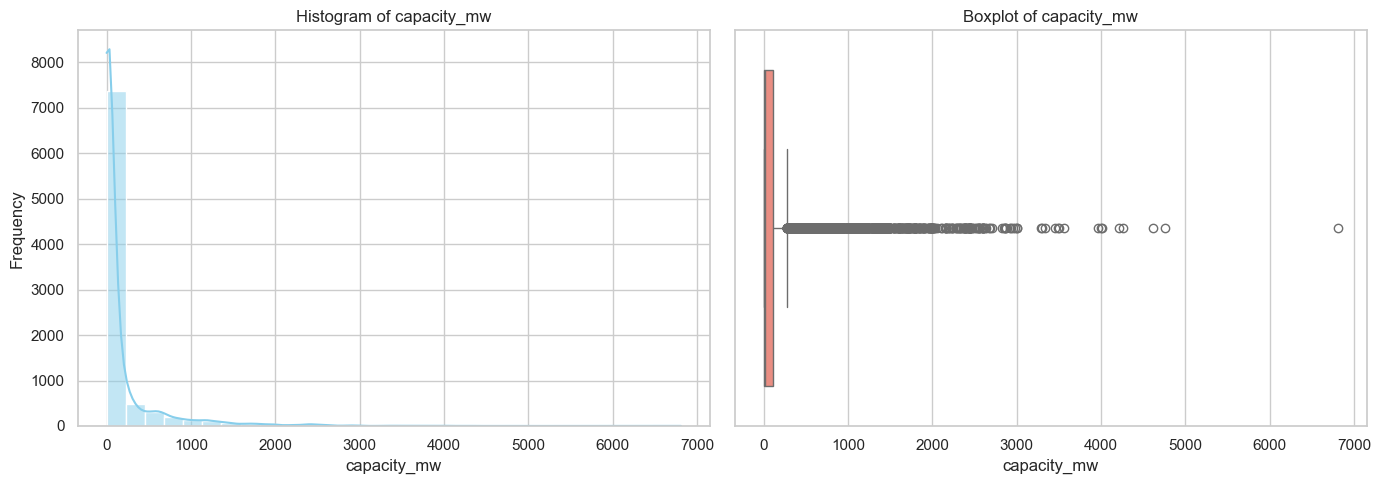

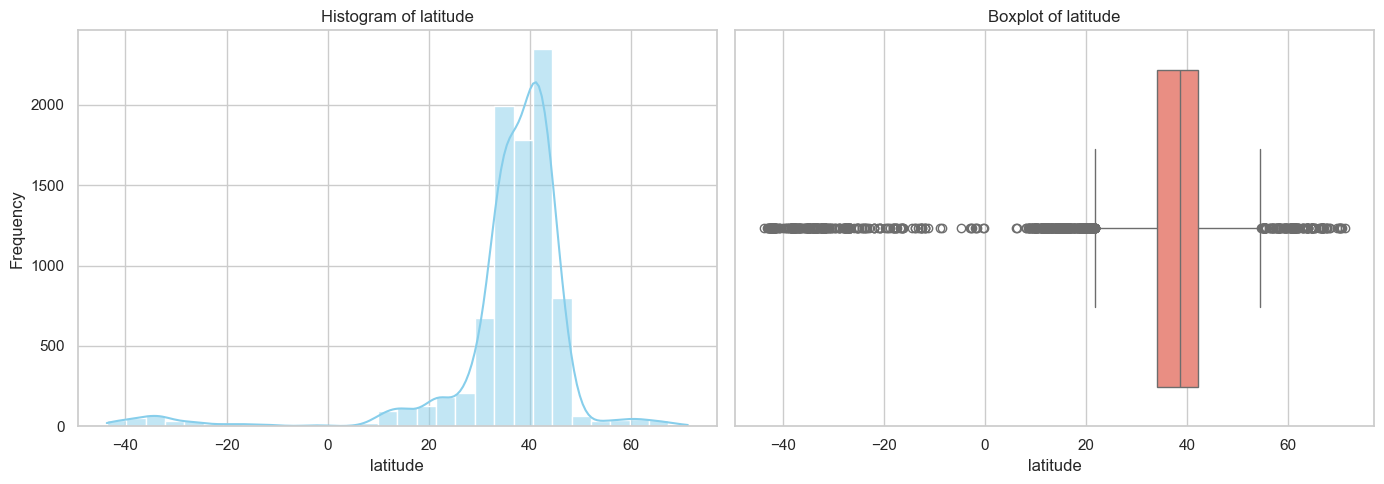

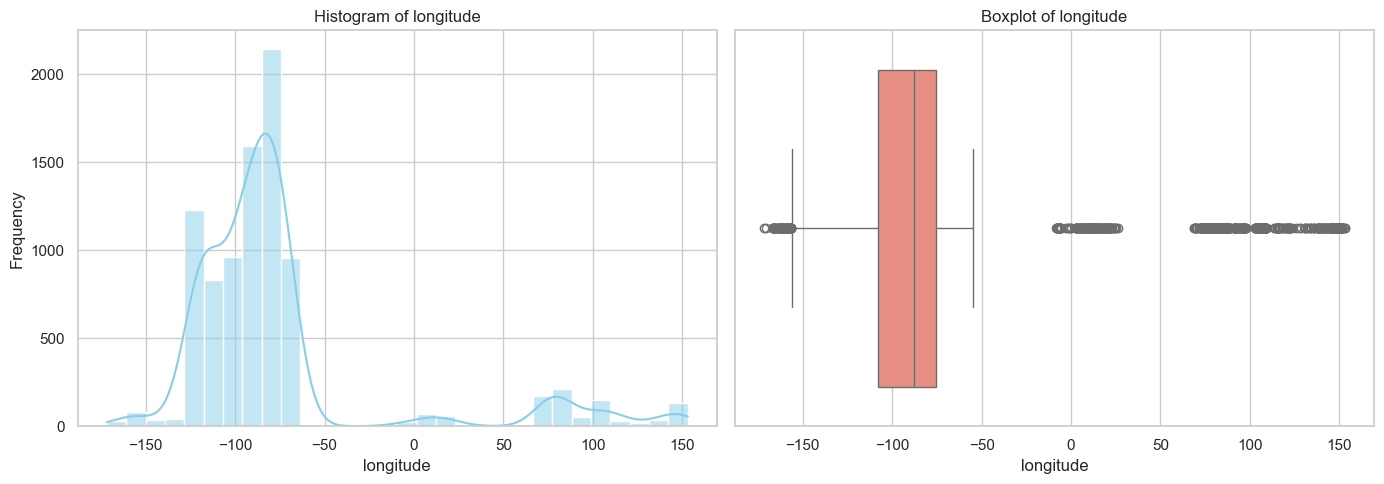

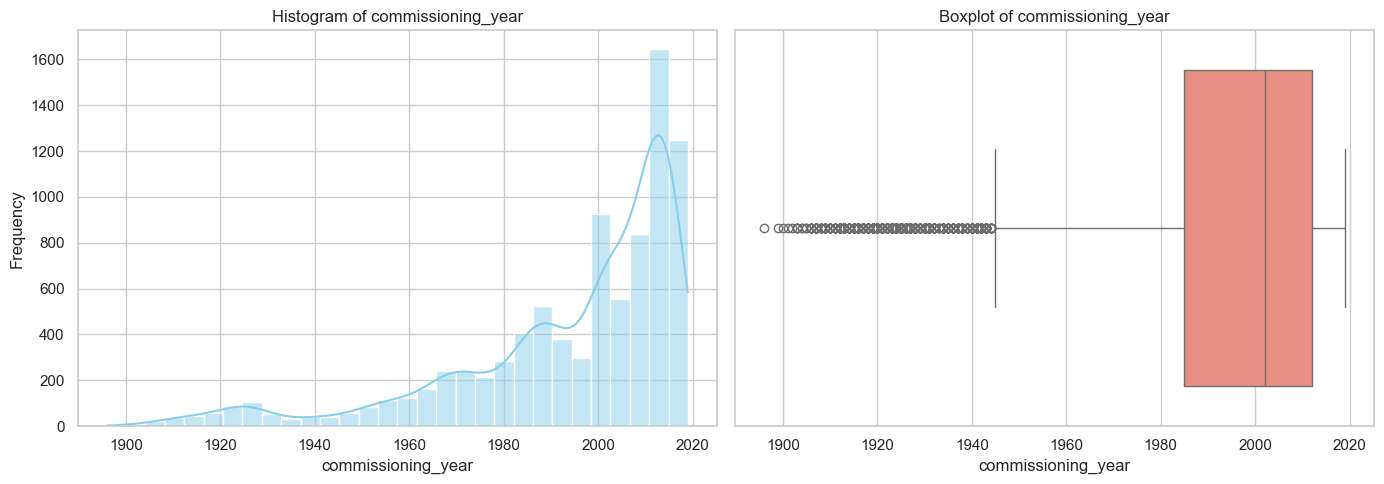

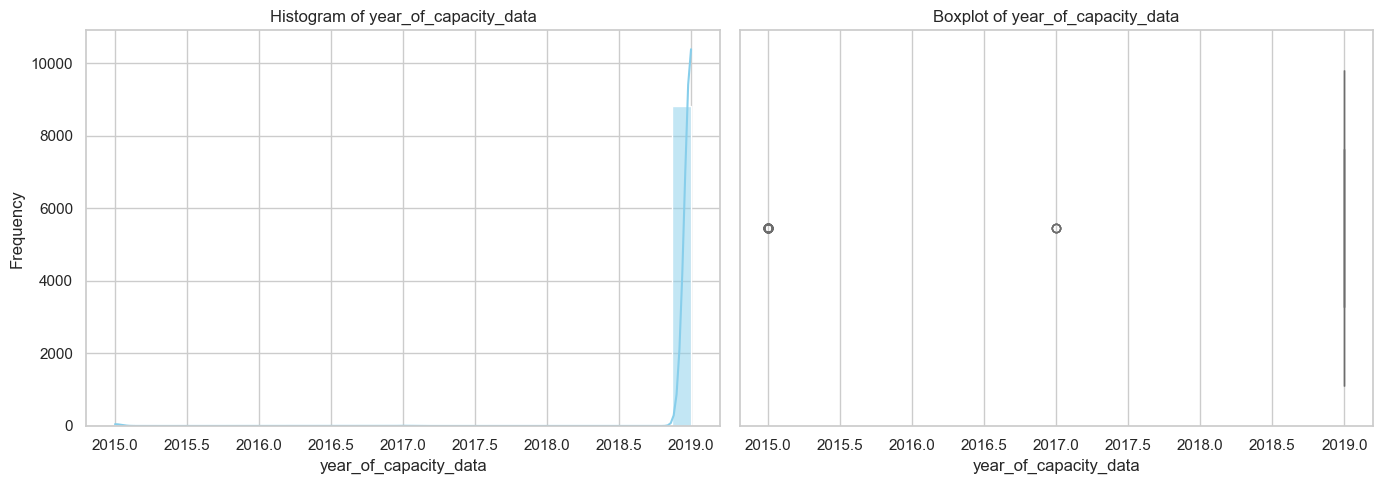

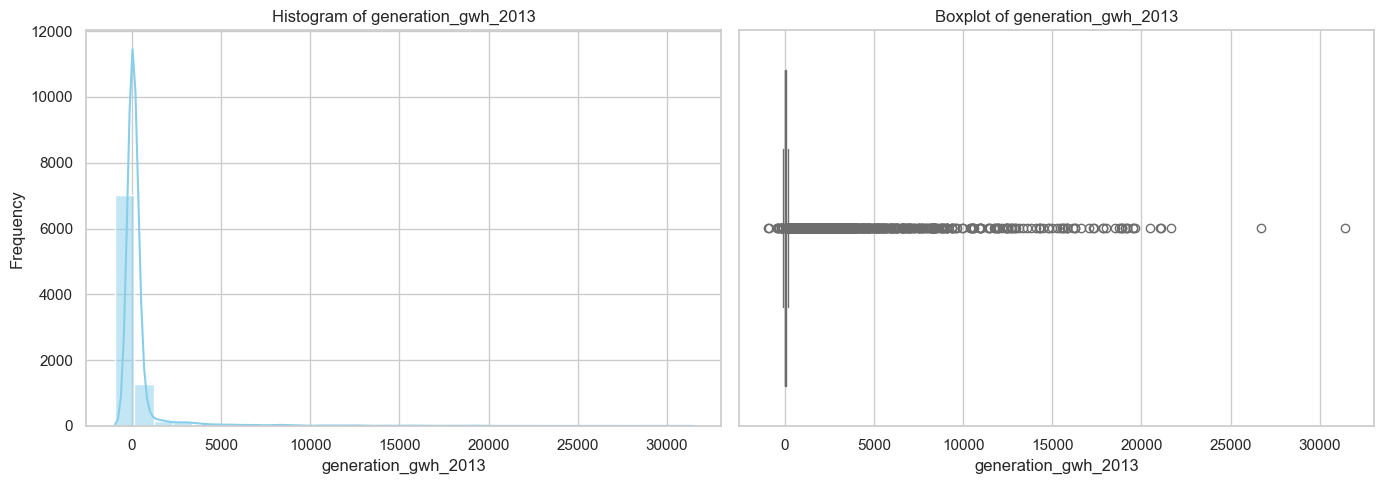

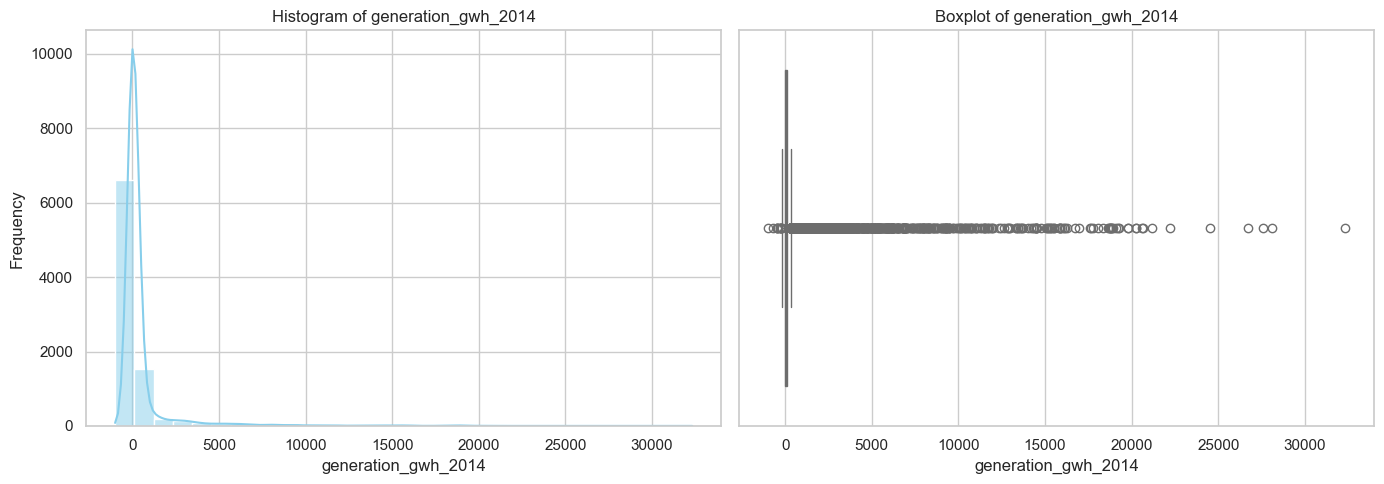

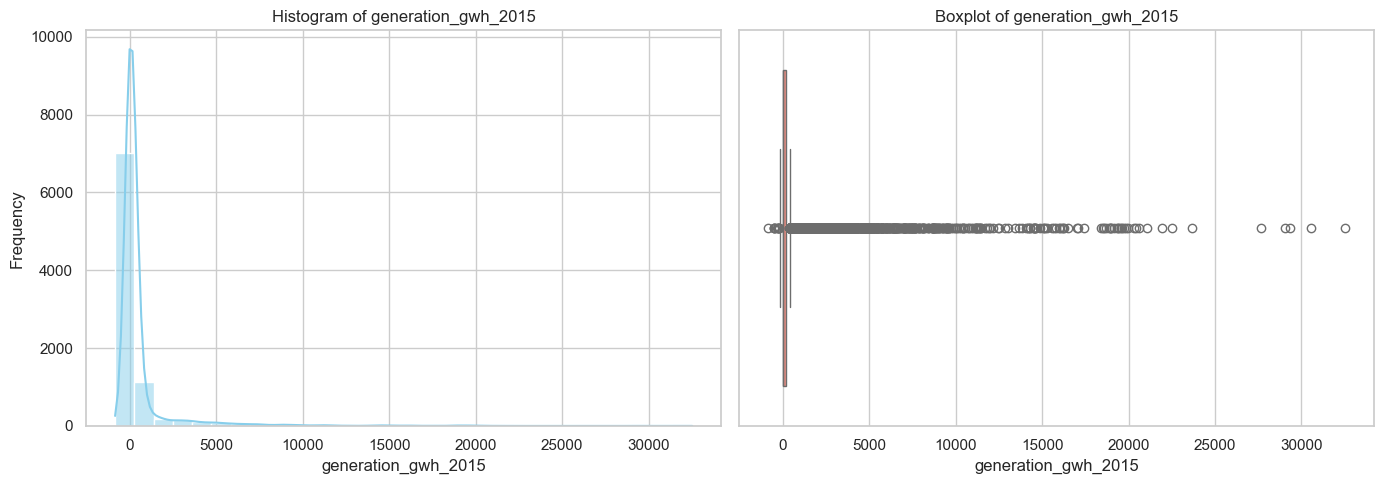

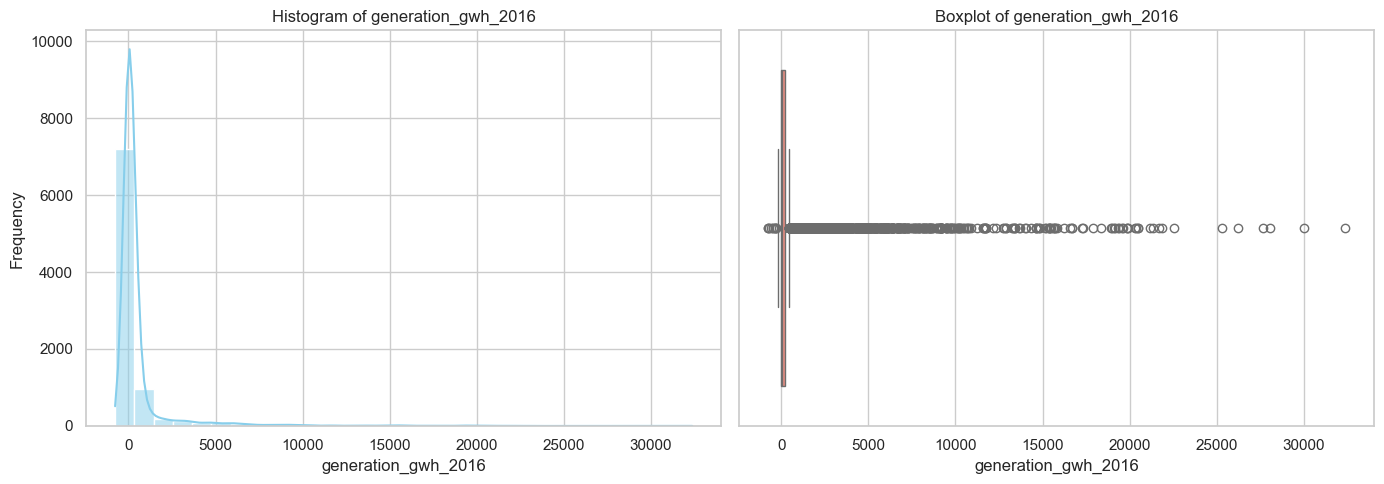

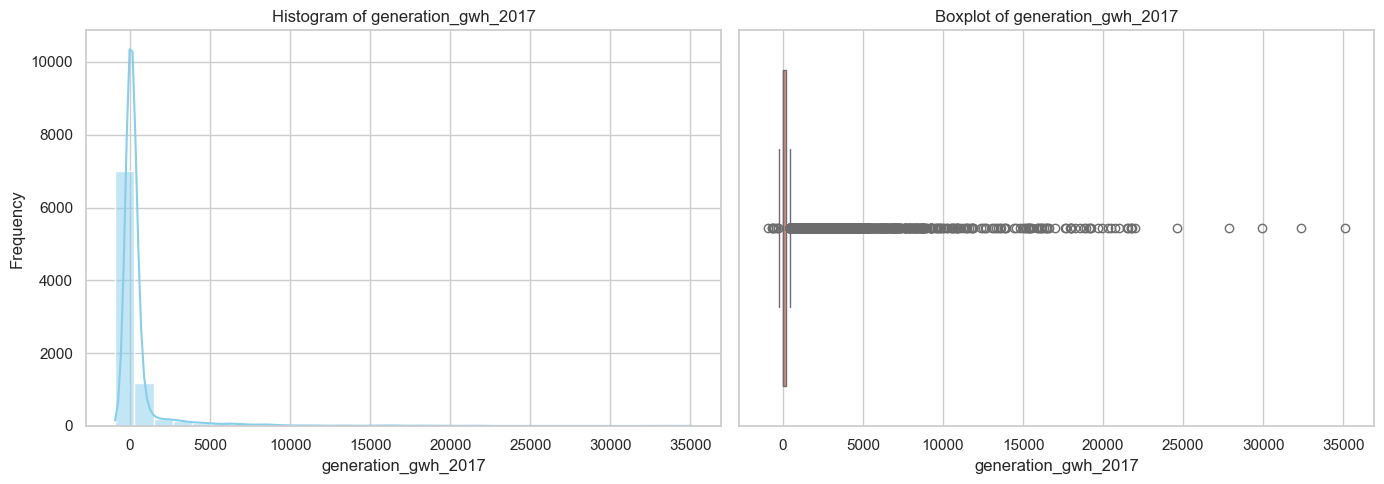

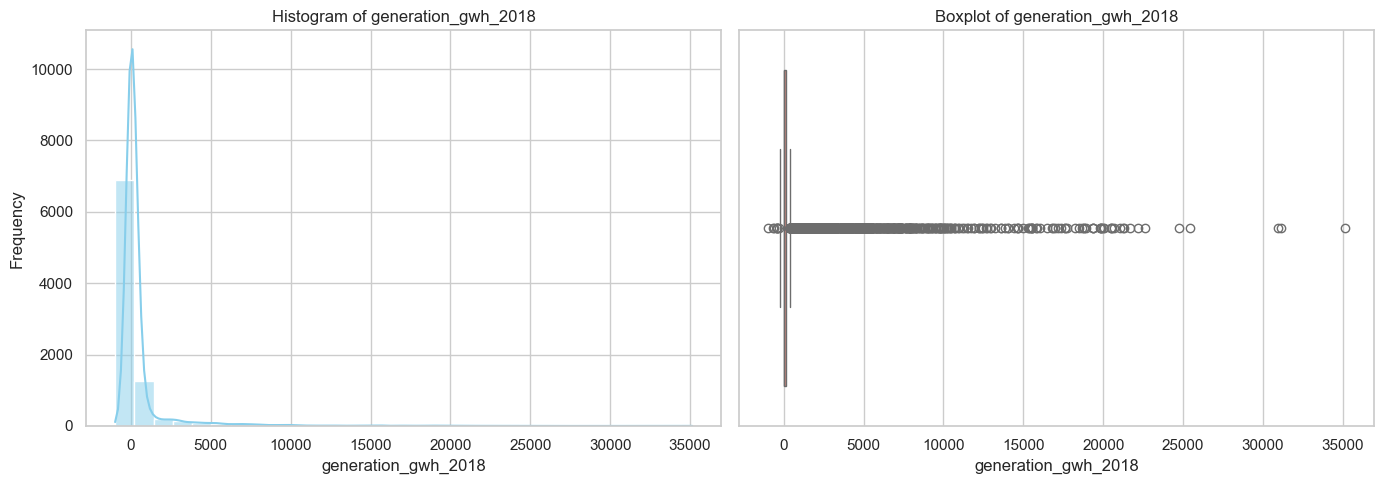

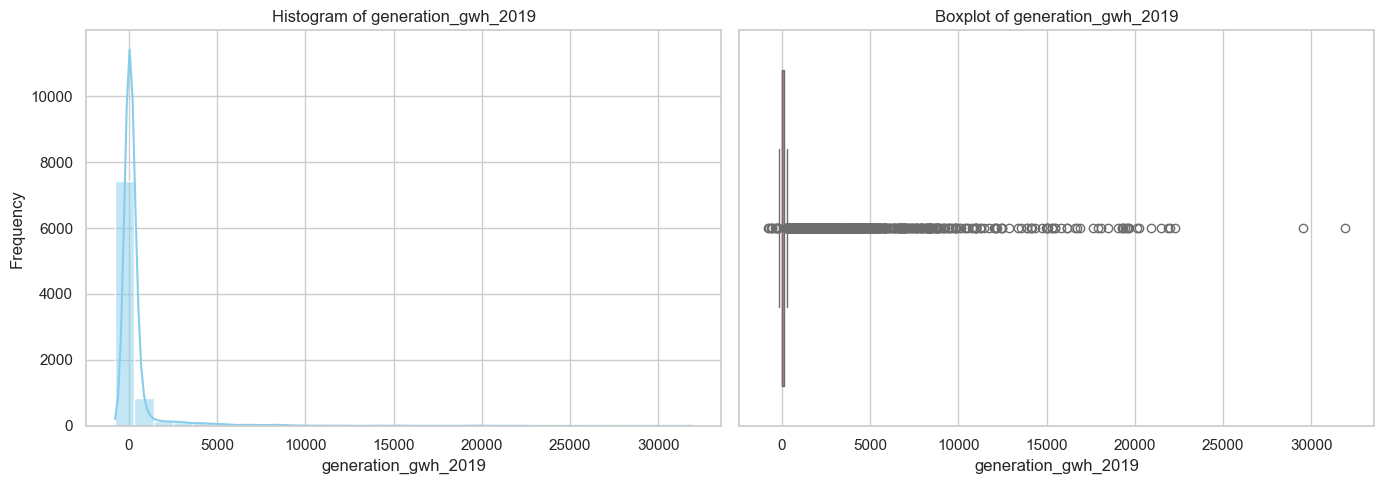

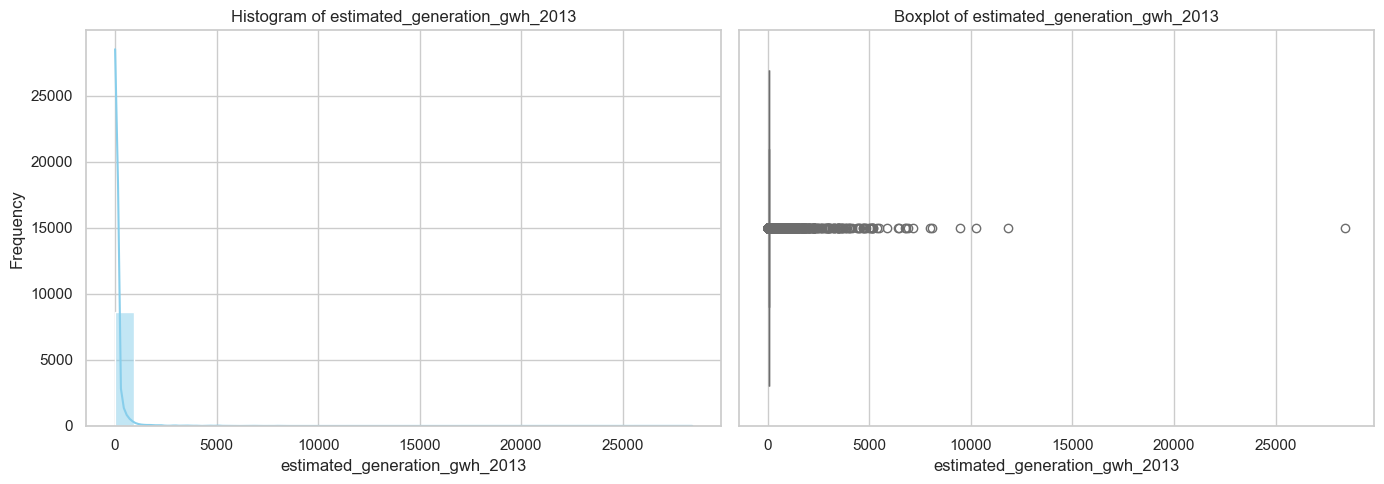

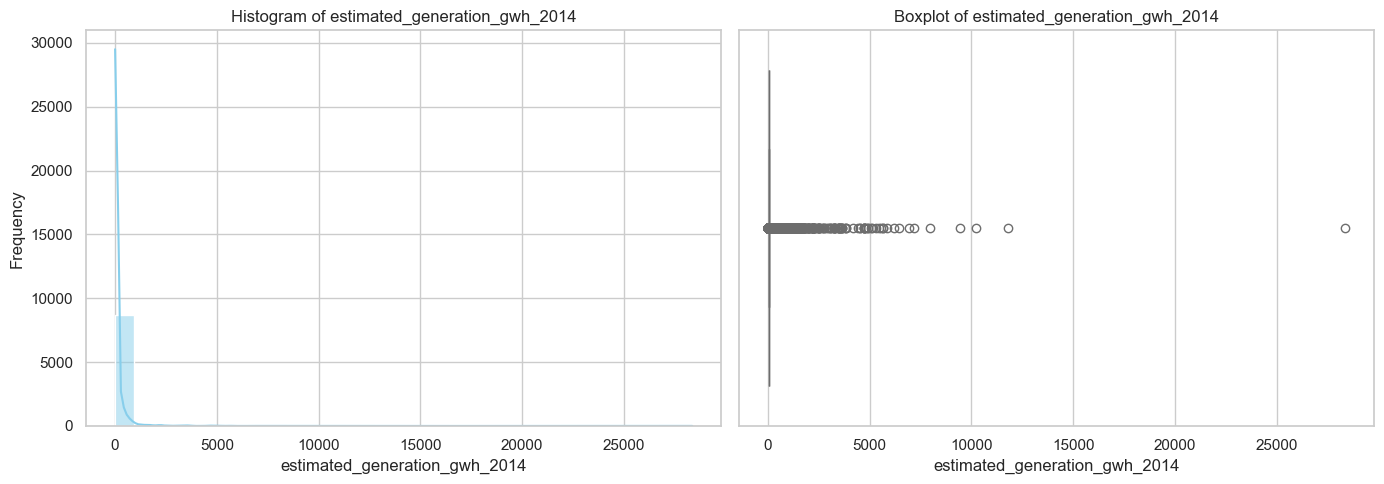

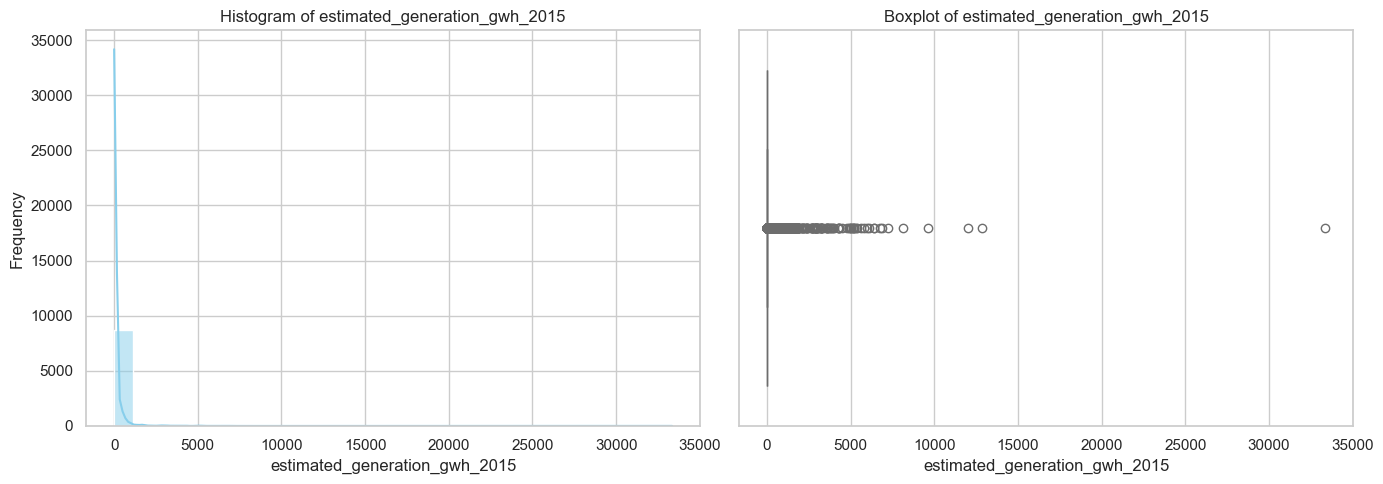

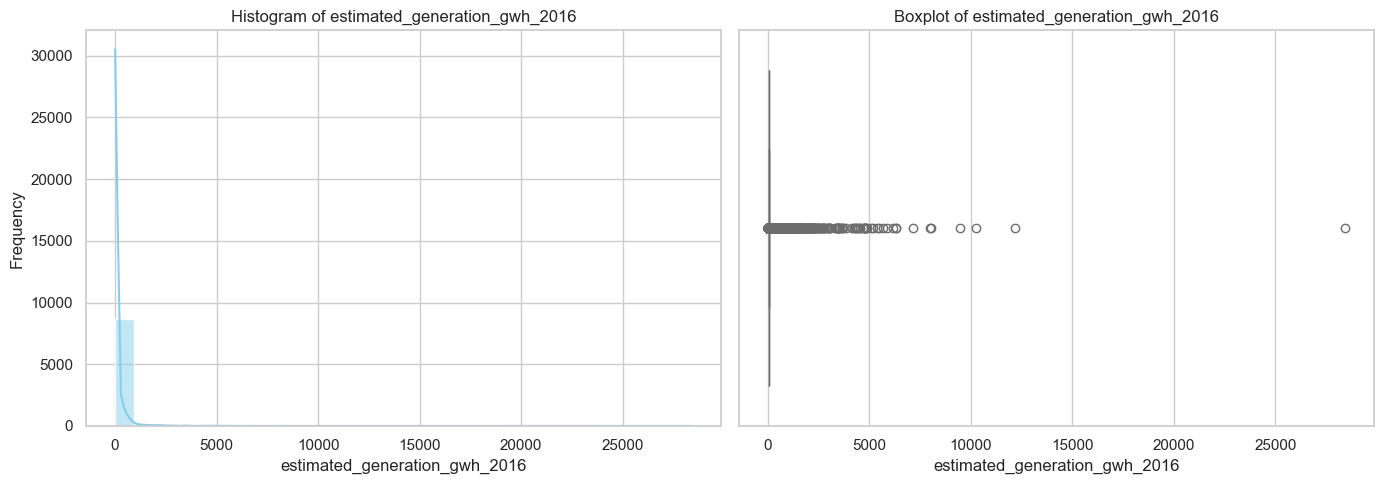

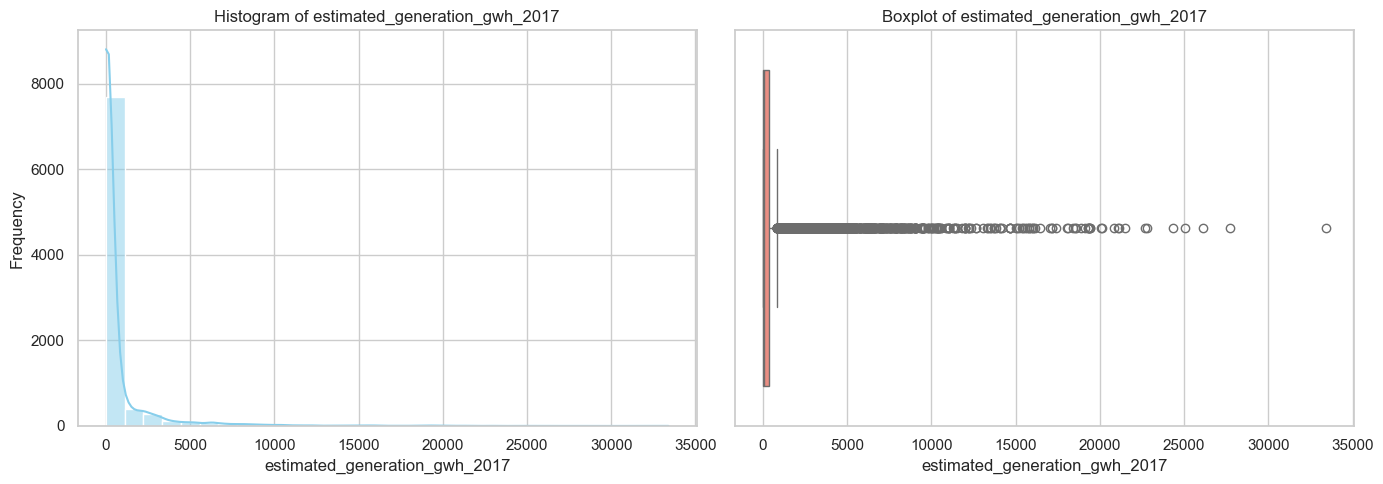

In [19]:
for column in numeric_df.columns:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numeric_df[column], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=numeric_df[column], color='salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

    plt.tight_layout()
    plt.show()

Visualization: what is expected

Histogram: Distribution shape (e.g., normal, skewed), mode(s), frequency
Boxplot: Median, quartiles, and outliers (points outside the whiskers)


Add log scale for skewed variable (capacity_mw)
Histogram and boxplot for capacity_mw with log scale

Text(0, 0.5, 'Frequency')

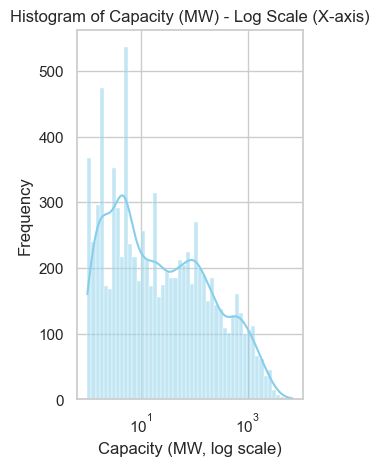

In [21]:
plt.subplot(1, 2, 1)
sns.histplot(df['capacity_mw'], kde=True, bins=50, color='skyblue', log_scale=(True, False))
plt.title('Histogram of Capacity (MW) - Log Scale (X-axis)')
plt.xlabel('Capacity (MW, log scale)')
plt.ylabel('Frequency')

Boxplot with log scale

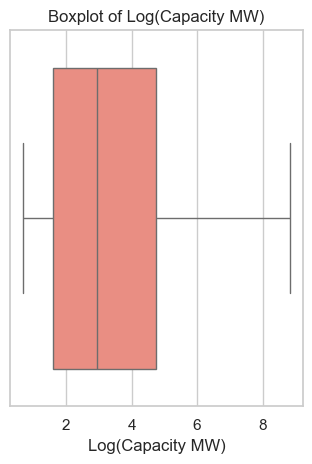

In [20]:
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['capacity_mw']), color='salmon')
plt.title('Boxplot of Log(Capacity MW)')
plt.xlabel('Log(Capacity MW)')

plt.tight_layout()
plt.show()

Plot capacity by primary_fuel and country

compare distributions of capacity_mw across fuel types and countries

Boxplot: capacity_mw by primary_fuel

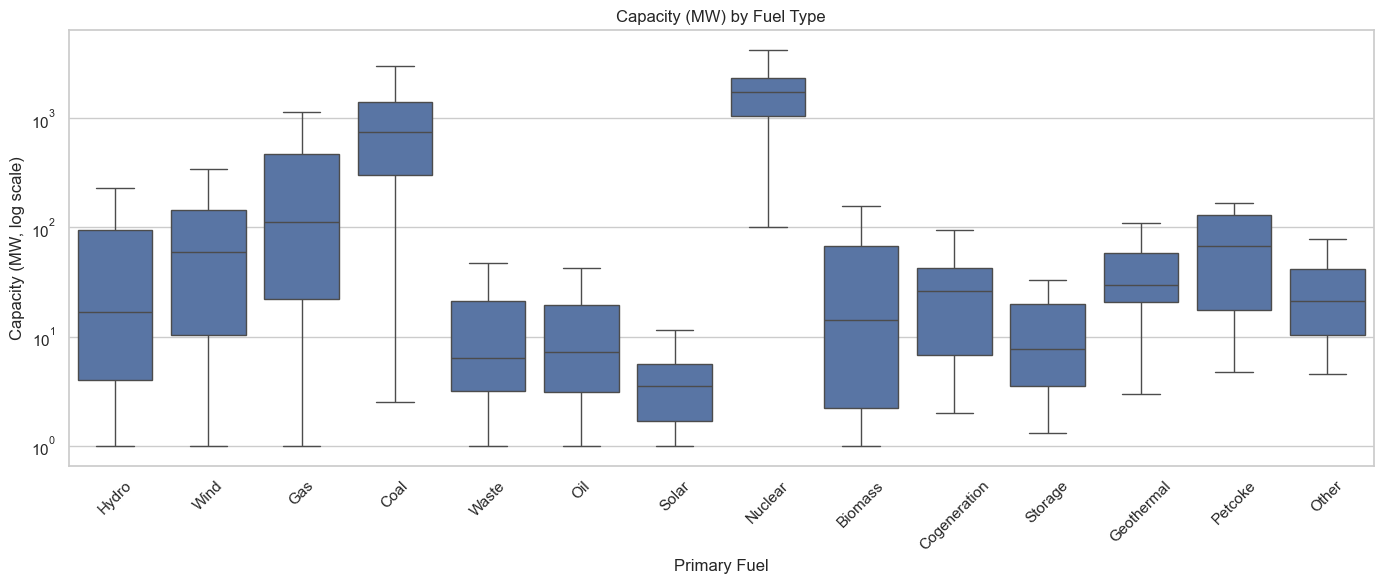

In [22]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=df, showfliers=False)
plt.yscale('log')  # Log scale to handle skewed data
plt.title('Capacity (MW) by Fuel Type')
plt.xlabel('Primary Fuel')
plt.ylabel('Capacity (MW, log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The boxplot above illustrates capacity (Mw) by fuel type. The first three top producers are no doubt, in descending order:
nuclear, coal adn gas, quite far ahead of solar energy, the very last fuel type (concerning capacity)...Oil and waste are ranking just before solar energy.

Boxplot: Top 10 Countries by Frequency (plant count)

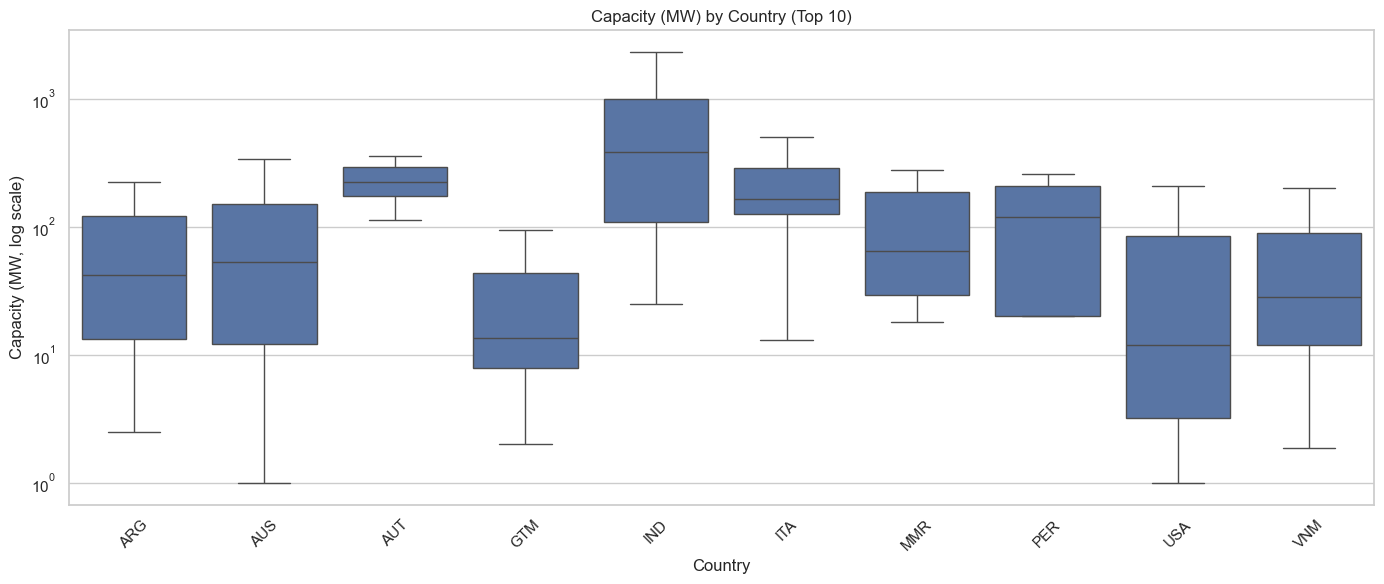

In [23]:
top_countries = df['country'].value_counts().nlargest(10).index
df_top = df[df['country'].isin(top_countries)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='country', y='capacity_mw', data=df_top, showfliers=False)
plt.yscale('log')
plt.title('Capacity (MW) by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Capacity (MW, log scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Statistical Analysis #
analysis of power output by fuel type (NumPy’s statistical functions)
Regarding power output by fuel type, India is in the lead, followed by Italy, and Austria.

In [25]:
import numpy as np

# Group data by primary fuel type
fuel_groups = df.groupby('primary_fuel')['capacity_mw']

# Initialize a summary dictionary
fuel_stats = {}

for fuel_type, values in fuel_groups:
    arr = np.array(values)
    fuel_stats[fuel_type] = {
        'count': len(arr),
        'mean': np.mean(arr),
        'median': np.median(arr),
        'std_dev': np.std(arr),
        'min': np.min(arr),
        'max': np.max(arr)
    }

Convert the dictionary to a DataFrame for better readability


Sort by mean output (descending)

In [26]:
fuel_stats_df = pd.DataFrame(fuel_stats).T  # Transpose for better layout
fuel_stats_df = fuel_stats_df.round(2)

Display the result

In [ ]:
print("Power Output Statistics by Fuel Type (MW):\n")
print(fuel_stats_df)

ANOVA (Analysis of Variance) 
inferential statistics: hypothesis testing (scipy.stats.f_oneway)
Question: does mean power output (capacity_mw) differ significantly between fuel types?

In [27]:
from scipy.stats import f_oneway


Filter out fuels with very few samples to avoid bias

In [29]:
min_samples = 30
fuel_counts = df['primary_fuel'].value_counts()
valid_fuels = fuel_counts[fuel_counts >= min_samples].index
df_filtered = df[df['primary_fuel'].isin(valid_fuels)]

Prepare groups: list of capacity arrays for each fuel type

In [30]:
groups = [group['capacity_mw'].values for name, group in df_filtered.groupby('primary_fuel')]

Apply one-way ANOVA

In [31]:
f_stat, p_value = f_oneway(*groups)

In [32]:
print(f"ANOVA F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

ANOVA F-statistic: 549.1902
P-value: 0.0000e+00


Interpretation

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("\n Result: Reject the null hypothesis — at least one fuel type has a different mean capacity.")
else:
    print("\n Result: Fail to reject the null hypothesis — no significant difference in means.")


❗ Result: Reject the null hypothesis — at least one fuel type has a different mean capacity.


# Time Series Analysis #

Fuel Mix Trends Over Time (commissioning_year column)
Group and Aggregate by Year and Fuel Type
Filter data with valid commissioning years

In [35]:
df_year_fuel = df[df['commissioning_year'].notnull()].copy()
df_year_fuel['commissioning_year'] = df_year_fuel['commissioning_year'].astype(int)


Filter data with valid commissioning years

In [36]:
df_year_fuel = df[df['commissioning_year'].notnull()].copy()
df_year_fuel['commissioning_year'] = df_year_fuel['commissioning_year'].astype(int)


Group by year and fuel, summing capacity

In [37]:
fuel_mix_by_year = df_year_fuel.groupby(['commissioning_year', 'primary_fuel'])['capacity_mw'].sum().unstack(fill_value=0)


Preview

In [38]:
print(fuel_mix_by_year.tail())

primary_fuel        Biomass     Coal  Cogeneration     Gas  Geothermal  \
commissioning_year                                                       
2015                   73.6  21235.0          15.4  9705.0        28.7   
2016                    6.6  12080.0           0.0  6210.9         0.0   
2017                   33.0   2100.0           0.0  2745.2        19.2   
2018                    0.0      0.0           0.0  1716.5        44.3   
2019                    0.0      0.0           0.0    33.0         0.0   

primary_fuel         Hydro  Nuclear   Oil  Other  Petcoke   Solar  Storage  \
commissioning_year                                                           
2015                3851.9   2000.0   7.1    0.0      0.0  2939.7     59.3   
2016                 505.5      0.0  47.7    0.0      0.0  6136.5     21.4   
2017                1777.3      0.0   6.0   10.0      0.0  3225.7     20.0   
2018                 452.0      0.0   0.0    0.0      0.0    38.5      0.0   
2019         

Plot Area Chart of Fuel Mix Over Time

<Figure size 1400x700 with 0 Axes>

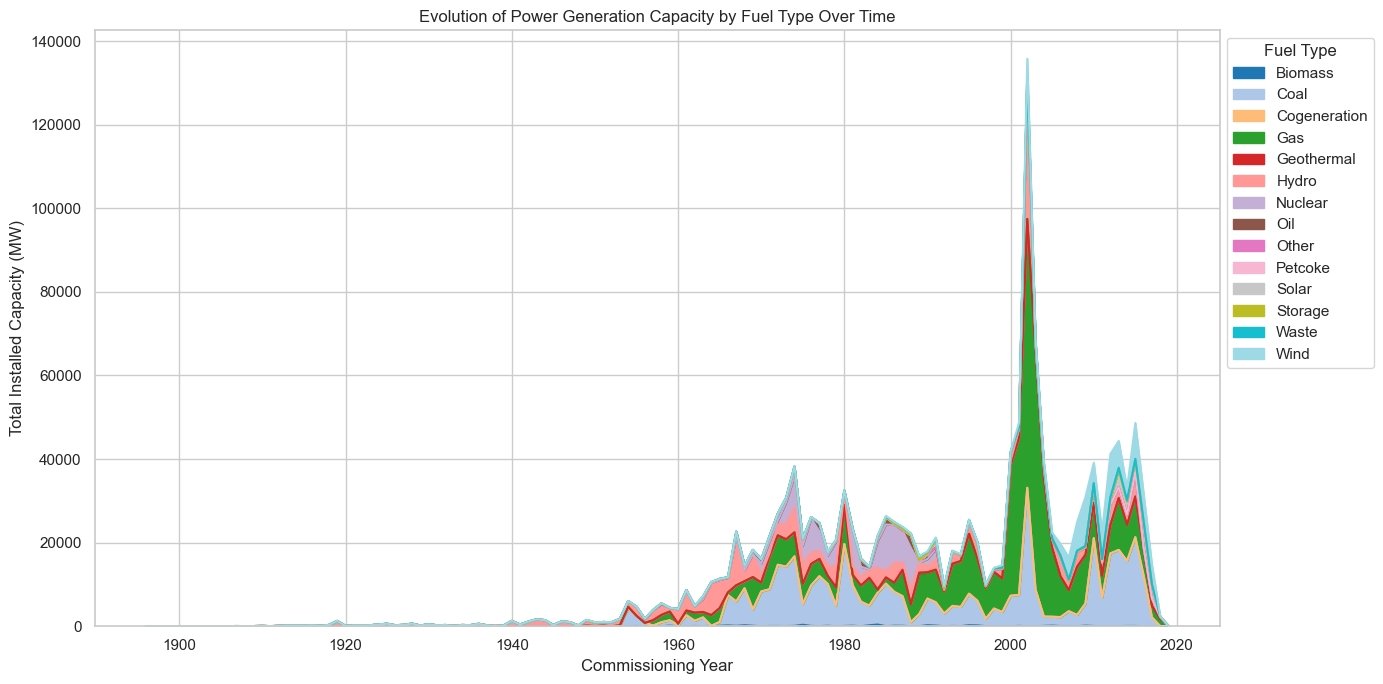

In [39]:
plt.figure(figsize=(14, 7))
fuel_mix_by_year.plot.area(stacked=True, figsize=(14, 7), cmap="tab20")
plt.title('Evolution of Power Generation Capacity by Fuel Type Over Time')
plt.xlabel('Commissioning Year')
plt.ylabel('Total Installed Capacity (MW)')
plt.legend(title='Fuel Type', loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()
plt.grid(True)
plt.show()

What This Tells You
Rise of renewables like solar and wind in recent decades
Decline or stagnation of coal, oil, and nuclear
Hydro may remain steady due to early development


# Advanced Visualization #

Create visualizations of power plants geographical distribution using latitude and longitude data

Static Map with GeoPandas + Matplotlib

In [74]:
!pip install geodatasets

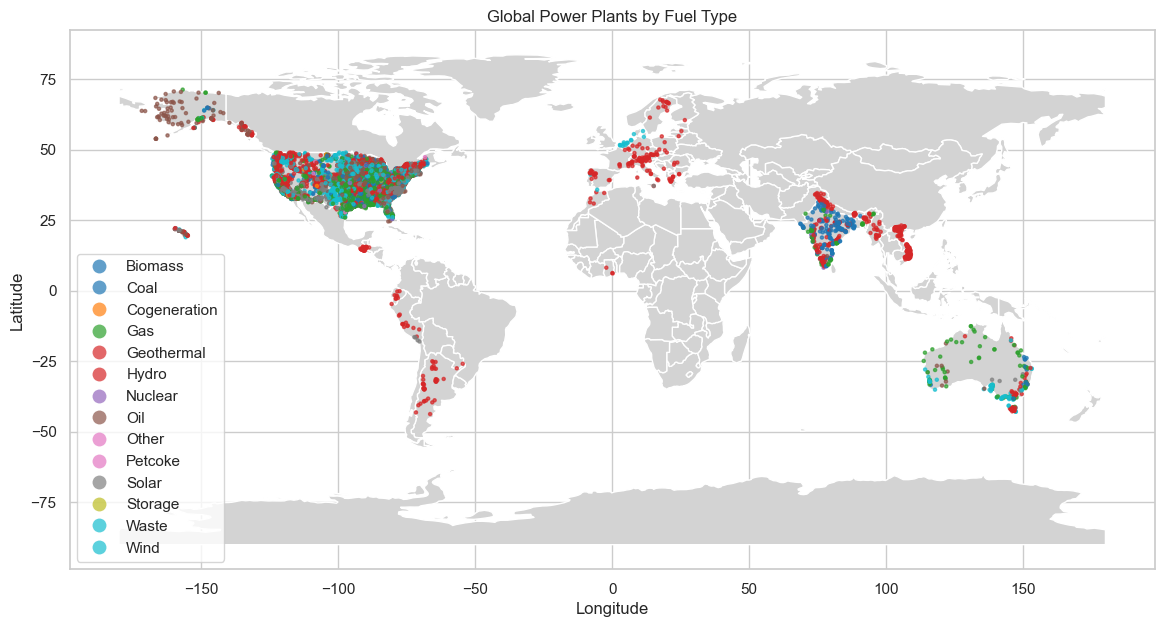

In [75]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Build GeoDataFrame of power plants
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Load basemap
world = gpd.read_file(
  "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)

# Plot
fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')
gdf.plot(
    ax=ax,
    column='primary_fuel',
    categorical=True,
    legend=True,
    markersize=5,
    alpha=0.7,
    cmap='tab10'
)
ax.set_title('Global Power Plants by Fuel Type')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Matrix Operations Analysis

One-Hot Encode the primary_fuel column (Each fuel type becomes a binary vector)

In [4]:
import pandas as pd  # Ensure this is present
import numpy as np

df = pd.read_csv("global_power_plant_database.csv")

C:\Users\AQS_PSTB\AppData\Local\Temp\ipykernel_26820\2154452519.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("global_power_plant_database.csv")


In [5]:
fuel_matrix = pd.get_dummies(df['primary_fuel'])

Combine with capacity and location

In [6]:
features = pd.concat([fuel_matrix, df[['capacity_mw', 'latitude', 'longitude']]], axis=1)

In [7]:
features = features.dropna()

Construct Matrix and Perform Basic Operations

Convert to NumPy matrix

In [8]:
X = features.to_numpy()


Compute covariance matrix (relationships between variables)

In [9]:
print(X.dtype)

object


In [10]:
X_numeric = X.astype(np.float64)  # or float
cov_matrix = np.cov(X_numeric, rowvar=False)
X = features.values.astype('float64')
cov_matrix = np.cov(X, rowvar=False)

In [11]:
#Compute correlation matrix (scaled relationships)
corr_matrix = np.corrcoef(X, rowvar=False)

In [12]:
#Convert back to DataFrame for readability
feature_names = features.columns
corr_df = pd.DataFrame(corr_matrix, index=feature_names, columns=feature_names)

Analyze Fuel Type Relationships with Capacity and Location

Extract the correlation of each fuel type with capacity, latitude, and longitude.
Extract capacity and location correlations

In [ ]:
correlations = corr_df[['capacity_mw', 'latitude', 'longitude']].loc[fuel_matrix.columns]

*Round and display*

In [52]:
correlations = correlations.round(2)
print("Correlation of Fuel Type with Capacity and Geographic Location:\n")
print(correlations)

Correlation of Fuel Type with Capacity and Geographic Location:

              capacity_mw  latitude  longitude
Biomass             -0.04      0.02      -0.04
Coal                 0.46     -0.08       0.21
Cogeneration        -0.02     -0.00      -0.02
Gas                  0.17     -0.04      -0.04
Geothermal          -0.02      0.01      -0.06
Hydro               -0.08     -0.09       0.22
Nuclear              0.32      0.00       0.01
Oil                 -0.10      0.12      -0.09
Other               -0.01     -0.00      -0.02
Petcoke              0.00      0.00      -0.01
Solar               -0.20      0.05      -0.14
Storage             -0.01      0.01      -0.01
Waste               -0.09     -0.01      -0.01
Wind                -0.08      0.05      -0.09


*relevance of Eigenvectors and Eigenvalues in this context*

Eigenvectors and Eigenvalues are highly relevant when analyzing relationships between attributes like fuel type, capacity, and geographic location, especially when you're using matrix-based approaches such as Principal Component Analysis (PCA) or covariance analysis.

 1. Dimensionality Reduction (PCA)
When you have many variables (e.g., one-hot encoded fuel types, capacity, location), you may want to reduce the dimensionality while preserving most of the variance (information).

How eigenvectors and eigenvalues help:
The covariance matrix tells you how variables co-vary.
Eigenvectors of this matrix represent the principal components (directions of maximum variance).
Eigenvalues tell you how much variance is explained by each component.

In this case, PCA helps you:
Detect underlying patterns (e.g., clusters of fuel types in spatial/capacity space).
Visualize high-dimensional data in 2D/3D.
Remove noise or redundancy (e.g., highly correlated fuel types).

2. Feature Importance
Large eigenvalues point to directions (eigenvectors) that explain the most variance.
This can help rank which combinations of variables (e.g., fuel+location) matter most.

In [54]:
#Practical Example: PCA Using Eigenvectors

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features (important before PCA)
X_scaled = StandardScaler().fit_transform(features)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Eigenvalues (explained variance)
print("Explained variance by each principal component (eigenvalues):")
print(pca.explained_variance_ratio_)

# Eigenvectors (principal component directions)
print("\nEigenvectors (Principal Component Loadings):")
eigenvectors = pd.DataFrame(pca.components_, columns=features.columns)
print(eigenvectors.head())


Explained variance by each principal component (eigenvalues):
[1.19188802e-01 9.01679794e-02 7.23984881e-02 7.07834209e-02
 6.65414223e-02 6.47146650e-02 6.23288160e-02 6.00675056e-02
 5.94136227e-02 5.90653069e-02 5.89416202e-02 5.89214481e-02
 5.88993751e-02 5.74612293e-02 2.32207520e-02 1.78855460e-02
 5.49054542e-17]

Eigenvectors (Principal Component Loadings):
    Biomass      Coal  Cogeneration       Gas  Geothermal     Hydro   Nuclear  \
0 -0.048286  0.360148     -0.020693  0.089390   -0.045007  0.175951  0.138766   
1 -0.002096 -0.304590      0.001963 -0.350124   -0.023096  0.495531 -0.294867   
2 -0.034621  0.237872     -0.011761 -0.293696   -0.030170 -0.316537  0.050494   
3 -0.022767 -0.316863     -0.001288  0.739943   -0.023393 -0.225863 -0.250027   
4  0.011421  0.056212      0.013757 -0.066240   -0.015120 -0.350930 -0.174393   

        Oil     Other   Petcoke     Solar   Storage     Waste      Wind  \
0 -0.157137 -0.013531 -0.005616 -0.237934 -0.015259 -0.046856 -0.1179

Interpretation:
First few eigenvectors usually capture >80% of variance — you can project data onto them.
You’ll see how fuel types, capacity, and location combine in these directions.
Useful for clustering, anomaly detection, or understanding energy generation patterns across geographies.

Summary:
Concept	Meaning in Your Context
Eigenvector	A direction in the data space (e.g., pattern of fuel use)
Eigenvalue	The strength (variance) of that direction
PCA	Finds key patterns (fuel+location mix) using eigenvectors

Advanced Filtering & Conditional Logic with NumPy + Pandas

Use np.where or np.select for clean, fast conditional logic
Instead of row-wise apply() (which is slower), you can use NumPy to create new columns or filter data:

import numpy as np

Example: flag large-capacity plants*

In [56]:
df['LargePlant'] = np.where(df['capacity_mw'] > 500, True, False)

Complex category assignment based on multiple conditions

In [57]:
conditions = [
    (df['capacity_mw'] >= 1000) & (df['primary_fuel'] == 'Nuclear'),
    (df['capacity_mw'] < 500) & (df['primary_fuel'] == 'Solar')
]
choices = ['Big Nuclear', 'Small Solar']
df['Category'] = np.select(conditions, choices, default='Other')

This method is vectorized, fast, and readable—even for large datasets 

Use Boolean masks derived from NumPy arrays for complex filtering
You can construct filters in NumPy and reuse them efficiently with Pandas indexing:

In [58]:
mask = (df['capacity_mw'].values > 200) & (df['latitude'].values > 0)
df_filtered = df.loc[mask, :]

#Enhancing Matplotlib Plots via NumPy Arrays#
NumPy enables you to precompute complex or custom data arrays for plotting—perfect for smooth curves, masks, or transformations.
Smooth histograms with pre-binned data:

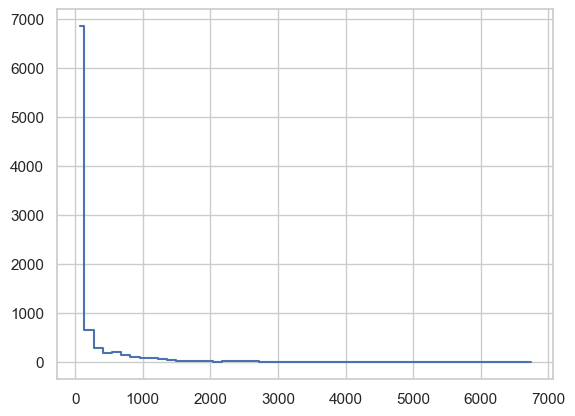

In [59]:
counts, bins = np.histogram(df['capacity_mw'], bins=50)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.plot(bin_centers, counts, drawstyle='steps-mid')

Or transform axes more efficiently:

Using NumPy arrays ensures smooth curves and efficient generation of plot signals (e.g. sine/cosine) for scientific visuals .

A Complete Example: Power Mixing by Region
Complex filtering
Filter for plants in Northern Hemisphere with capacity < 1000 MW

Filter your GeoDataFrame
#Assuming 'gdf' is your GeoDataFrame with 'latitude' and 'capacity_mw'

In [77]:

gdf_north = gdf[(gdf['latitude'] > 0) & (gdf['capacity_mw'] < 1000)]
#This uses vectorized boolean filtering on numeric columns—an efficient NumPy-style operation within Pandas/GeoPandas.

#Load a basemap (via Natural Earth)

In [78]:
import geopandas as gpd

# Directly load world boundaries
world = gpd.read_file(
    "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
)

In [79]:
mask = (df['latitude'].values > 0) & (df['capacity_mw'].values < 1000)
df_north_small = df.loc[mask]

Plot the filtered layer


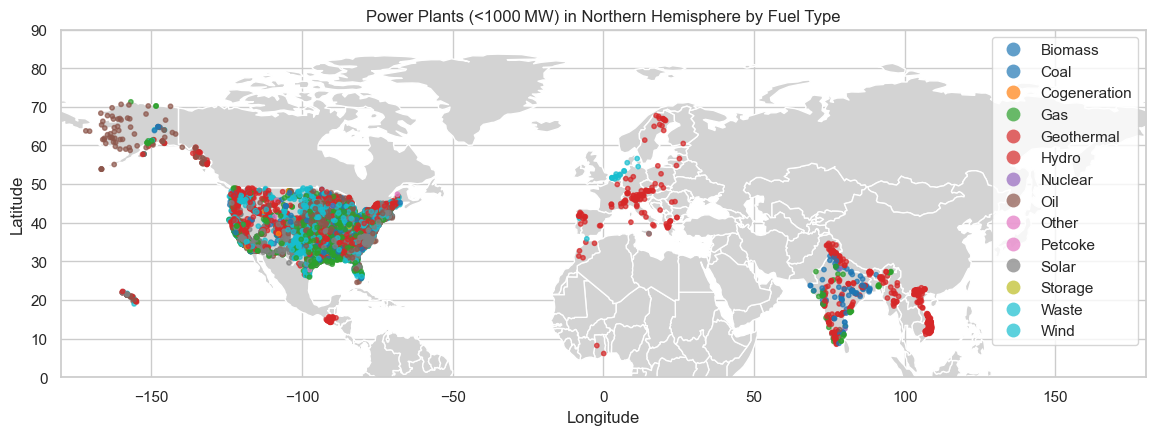

In [80]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='white')
gdf_north.plot(
    ax=ax,
    column='primary_fuel',
    categorical=True,
    legend=True,
    markersize=10,
    alpha=0.7,
    cmap='tab10'
)
ax.set_xlim(-180, 180)
ax.set_ylim(0, 90)
ax.set_title('Power Plants (<1000 MW) in Northern Hemisphere by Fuel Type')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Conditional assignment

In [62]:
df['SizeClass'] = np.where(df['capacity_mw'] < 500, 'Small',
                   np.where(df['capacity_mw'] < 2000, 'Medium', 'Large'))

Visualize distribution by size class

Text(0.5, 1.0, 'Capacity Distribution by Size Class')

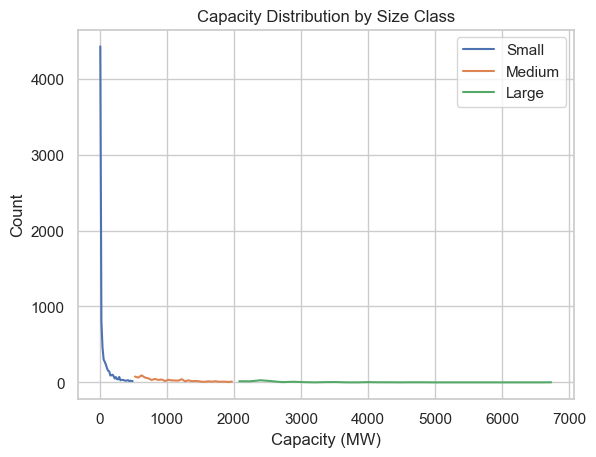

In [63]:
sizes = ['Small', 'Medium', 'Large']
for size in sizes:
    arr = df.loc[df['SizeClass'] == size, 'capacity_mw'].values
    counts, bins = np.histogram(arr, bins=30)
    plt.plot(0.5*(bins[:-1] + bins[1:]), counts, label=size)
plt.legend()
plt.xlabel('Capacity (MW)')
plt.ylabel('Count')
plt.title('Capacity Distribution by Size Class')

This leverages NumPy’s histogram and indexing to build a multi-line overlay plot—efficient and flexible.

Why It Matters
Performance: NumPy’s vectorized logic runs C‑level loops—faster than any Python loops or apply().

Flexibility: Custom filters or classification logic can be defined and reused with logical operators and np.where/np.select.

Plot readiness: Pre-binning and transformations with NumPy make Matplotlib visuals responsive, smooth, and customizable.

*Summary Table*

| Task                      | Pandas Approach                        | NumPy‑powered Approach                              |
| ------------------------- | -------------------------------------- | --------------------------------------------------- |
| Filter rows               | `df[df['A'] > 5 & df['B'] < 10]`       | `.loc[mask]` where `mask = arrA > 5 & arrB < 10`    |
| Create conditional column | `df.apply(lambda…)` or `df['col'] = …` | `np.where` or `np.select` (vectorized)              |
| Compute stats or bins     | `df['col'].hist()`                     | `np.histogram` + `plt.plot` for customization       |
| Plot a function or curve  | `df.plot()` or loops                   | `x = np.linspace(...)`, `y = f(x)`, then `plt.plot` |
